In [0]:
from fastai import *
from fastai.vision import *

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = Path('drive/My Drive')

In [0]:
path.ls()

In [0]:
dest = path/'bears/teddy'

In [0]:
dest.ls()

In [0]:
file = 'bears/teddy/teddys.txt'

In [0]:
download_images(urls=path/file, dest=dest, max_pics=300)

In [0]:
classes = ['teddy','grizzly','black']

In [0]:
mod_path = path/'bears'

In [7]:
for c in classes:
    print(c)
    verify_images(mod_path/c, delete=True, max_size=500)

teddy


grizzly


black


In [0]:
bears_path = path/'bears'

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(bears_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [10]:
data

ImageDataBunch;

Train: LabelList (305 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,black,black,black,black
Path: drive/My Drive/bears;

Valid: LabelList (76 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
grizzly,grizzly,black,black,black
Path: drive/My Drive/bears;

Test: None

In [11]:
data.classes

['black', 'grizzly', 'teddy', 'testing']

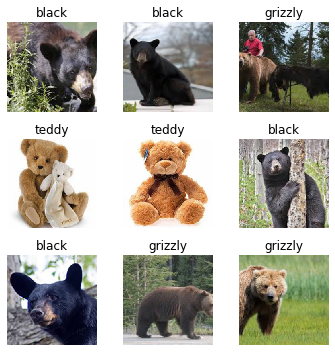

In [12]:
data.show_batch(rows=3, figsize=(5,5))

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [14]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.419616,0.135103,0.039474,00:06
1,0.791952,0.457623,0.052632,00:04
2,0.564850,0.437018,0.052632,00:04
3,0.461121,0.378157,0.052632,00:04


In [0]:
learn.save('bears_stage_1')

In [0]:
learn.unfreeze()

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


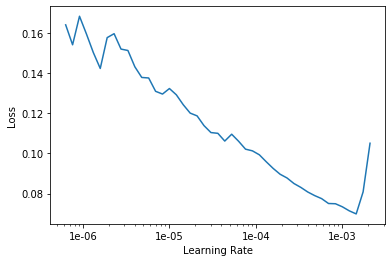

In [18]:
learn.recorder.plot()

In [24]:
learn.load('bears_stage_1')
learn.fit_one_cycle(2, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.122900,0.234929,0.052632,00:04
1,0.101325,0.228041,0.039474,00:04


In [0]:
learn.save('bears_stage_2')

In [0]:
learn.load('bears_stage_2')

In [0]:
interpretation = ClassificationInterpretation.from_learner(learn)

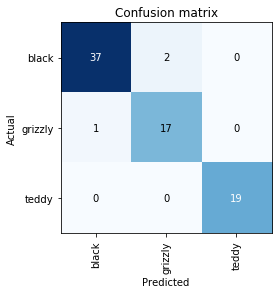

In [26]:
interpretation.plot_confusion_matrix()

In [32]:
path

PosixPath('drive/My Drive')

In [33]:
bears_path

PosixPath('drive/My Drive/bears')

In [0]:
img = open_image(bears_path/'testing/Grizzly-bear_test.jpg')

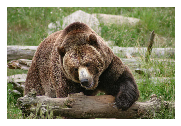

In [43]:
img.show(size=(5,5))

In [0]:
classes = ['black', 'grizzly', 'teddy']

In [0]:
data2 = ImageDataBunch.single_from_classes(bears_path, classes, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data2, models.resnet50)

In [0]:
learn.load('bears_stage_2')

In [0]:
pred_class, pred_idx, pred_outputs = learn.predict(img)

In [42]:
pred_class

Category grizzly

<h2>Learning rates and epochs</h2>


Very high learning rate 

In [14]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 232MB/s]


In [15]:
learn.fit_one_cycle(1, max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,18.309895,1235156992000.000000,1.000000,00:06


Very low learning rate 

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [17]:
learn.fit_one_cycle(5, max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,2.278331,1.381353,0.723684,00:04
1,2.250512,1.328527,0.671053,00:04
2,2.255201,1.301795,0.552632,00:04
3,2.202166,1.332711,0.526316,00:04
4,2.143343,1.396212,0.618421,00:04


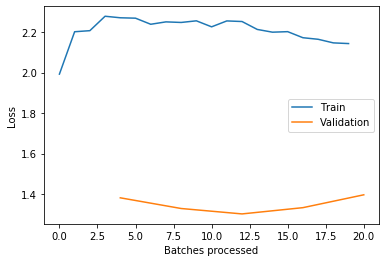

In [18]:
learn.recorder.plot_losses()

Less number of epochs

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [22]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.972283,17.870905,0.763158,00:04


More number of epochs--> Trying to overfit the model

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(bears_path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [25]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,2.328453,2.492191,0.859649,00:05
1,2.206784,2.403467,0.856725,00:02
2,2.156958,2.336805,0.859649,00:03
3,2.133642,2.250478,0.842105,00:03
4,2.042041,2.134136,0.827485,00:03
5,1.943334,1.961370,0.809942,00:03
6,1.808021,1.760963,0.742690,00:02
7,1.674848,1.557119,0.654971,00:02
8,1.546020,1.349354,0.602339,00:03
9,1.408975,1.164804,0.532164,00:03


trainloss > validationloss -- underfitting(train some more by increasing the number of epochs or by increasing the learning rate.

trainloss < validation loss -- overfitting
Reduce the number of epochs 

trainloss = validation loss gives the perfect model